# Modelo de predicción del clima en Los Angeles

In [6]:
estados=c('S1','S2','S3') #espacio de estados
mu0= c(.4,.4,2) #distribucion inicial
names(mu0) = estados
P=rbind(c(.4,.4,.2),c(.2,.5,.3),c(.1,.2,.7)) #matrix de transicion
dimnames(P)=list(estados,estados)
P
func.inic =cumsum(mu0) #funcion iniciacion
(func.act= t(apply(P,1,cumsum))) #funcion de actualizacion
n=1000 #numero de simulaciones deseadas
U = runif(n) #uniformes U1,...,Un en [0,1]
X=numeric(n)*NA #vector de valores simulados de la cadena, a completar
j=1
while(U[1]>func.inic[j])
j=j+1
X[1]=estados[j]
for (i in 2:n) {
    j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
    X[i] <- estados[j]
}

,S1,S2,S3
S1,0.4,0.4,0.2
S2,0.2,0.5,0.3
S3,0.1,0.2,0.7


,S1,S2,S3
S1,0.4,0.8,1
S2,0.2,0.7,1
S3,0.1,0.3,1


In [7]:
X[1:30] #imprimiendo los 30 primero valores 

[1] "S2" "S2" "S2" "S1" "S1" "S1" "S1" "S3" "S2" "S2" "S3" "S2" "S3" "S1" "S2"
[16] "S3" "S2" "S3" "S2" "S2" "S2" "S2" "S2" "S3" "S2" "S1" "S1" "S1" "S2" "S1"

In [8]:
x1=as.numeric(X=='S1') #creamos un vector con las distribuciones de S1
x2=as.numeric(X=='S2')*2 #creamos un vector con las distribuciones de S2
x3=as.numeric(X=='S3')*3 #creamo un vector con las distribuciones de S3
a=x1+x2+x3

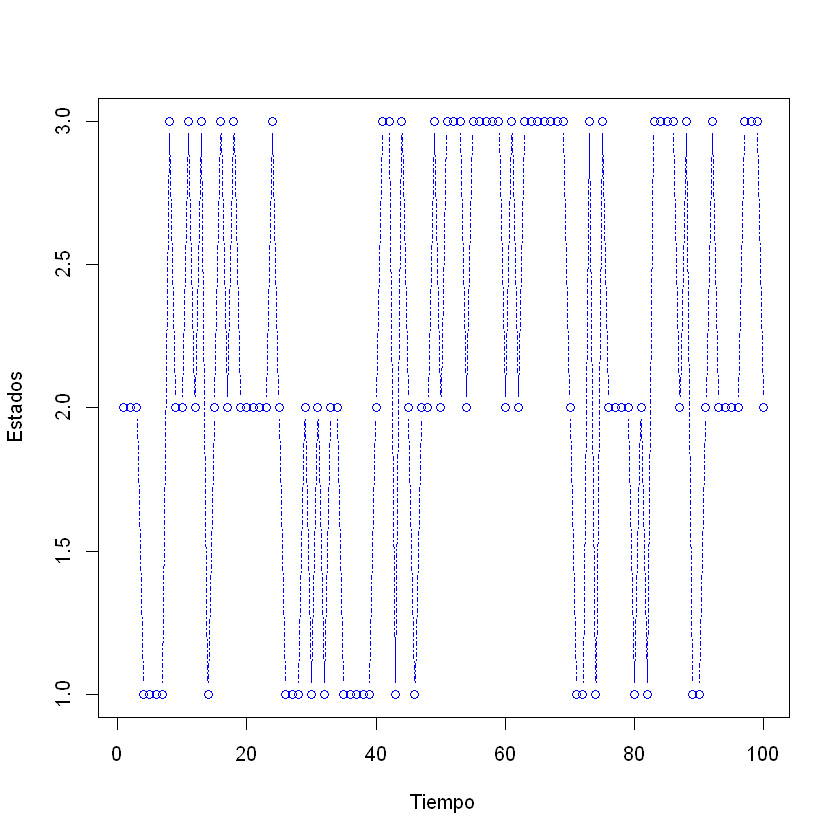

In [9]:
plot(1:100, a[1:100],type= 'b',col = 'blue',lwd = 1,las =.2, ylab= 'Estados',xlab='Tiempo',lty=10)